In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('covid_train.csv')
test = pd.read_csv('covid_test.csv')
train.head(2).T

,0,1
Name,shivani,isha
Test Date,24/3/2020,25/3/2020
Symptoms_1,Cough,Cough
Symptoms_2,Headache,Headache
Symptoms_3,Fever,Fever
Country Name,Iran,Mauritius
Fever since,4,7
Headche,2,4
Covid_yes_no,0,1


In [3]:
num_col=[]
cat_col = []
for i in train.columns:
    try:
        train[i].astype(float)
        num_col.append(i)
    except:
        cat_col.append(i)
num_col

['Fever since ', 'Headche ', 'Covid_yes_no']

In [4]:
to_remove=[]
for j in [train,test]:
    for i in cat_col:
        if j[i].nunique() > 5 and i in cat_col:
            print(i)
            cat_col.remove(i)
            to_remove.append(i)
        else:
            pass

Name 
Country Name
Test Date


In [5]:
to_remove

['Name ', 'Country Name', 'Test Date']

In [6]:
train.drop(columns=to_remove,axis=1,inplace=True)
test.drop(columns=to_remove,axis=1,inplace=True)

In [7]:
cat_col

['Symptoms_1', 'Symptoms_2', 'Symptoms_3']

In [8]:
for j in [train,test]:
    for i in cat_col:
        print(i,end=": ")
        print(j[i].unique())

Symptoms_1: ['Cough' 'Headache' nan]
Symptoms_2: ['Headache' 'Fever' nan]
Symptoms_3: ['Fever' 'Cough']
Symptoms_1: ['Headache' 'Cough']
Symptoms_2: ['Fever' 'Headache']
Symptoms_3: ['Cough' 'Fever']


In [9]:
for i in [train,test]:
    if 'Test Date' in i.columns:
        i.drop('Test Date',axis=1,inplace=True)

In [10]:
for i in [train,test]:
    i['Duration'] = i['Fever since ']+i['Headche ']
num_col.append('Duration')

In [11]:
for i in [train,test]:
    for j in i.columns:
        if j in num_col:
            mean_val = i[j].mean()
            i[j].fillna(mean_val,inplace=True)
        else:
            mode_val = i[j].mode()[0]
            i[j].fillna(mode_val,inplace=True)

C:\Users\farzi\AppData\Local\Temp\ipykernel_4208\2014247632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = train.corr()


<Axes: >

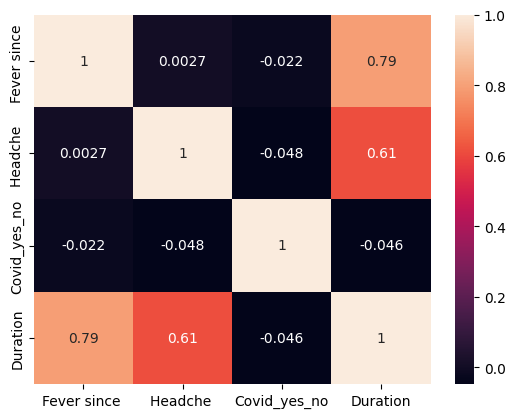

In [12]:
cor_mat = train.corr()
sns.heatmap(cor_mat,annot=True)

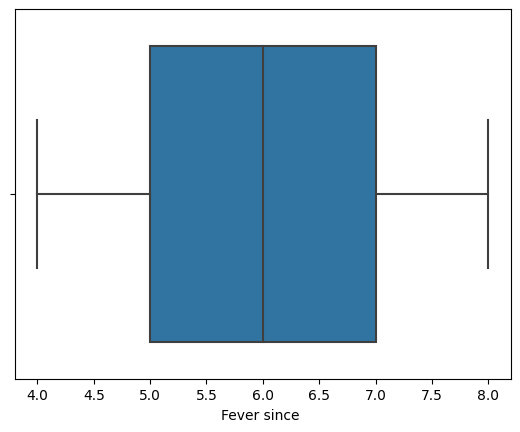

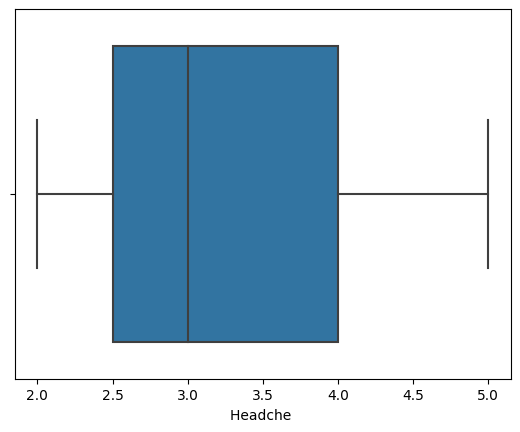

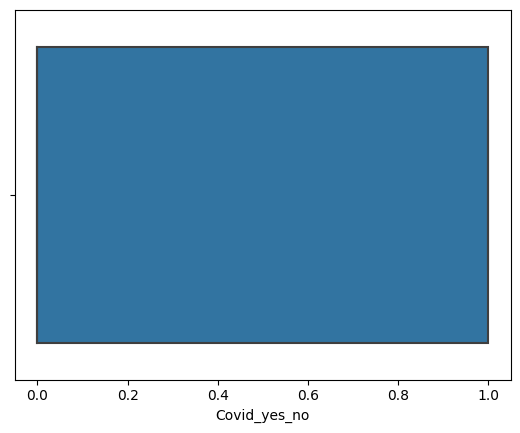

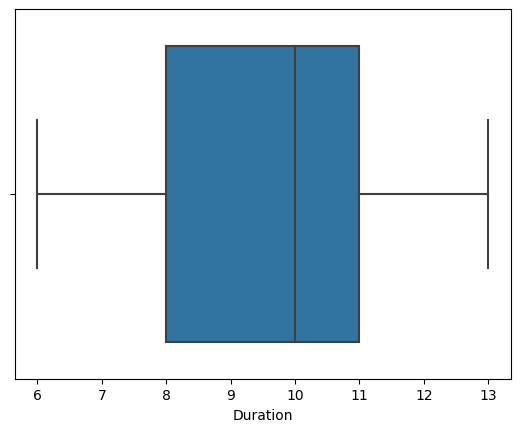

In [13]:
for i in num_col:
    sns.boxplot(train,x=train[i])
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
encoder = LabelEncoder()
scaler = StandardScaler()
num_col.remove('Covid_yes_no')
for i in [train,test]:
    i[cat_col] = i[cat_col].apply(encoder.fit_transform)
    i[num_col] = scaler.fit_transform(i[num_col])


In [16]:
x_train = train.drop('Covid_yes_no',axis=1,inplace=False)
y_train = train['Covid_yes_no']

In [17]:
x_test = test.drop('Covid_yes_no',axis=1,inplace=False)
y_test = test['Covid_yes_no']

In [18]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [19]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[28,  1],
       [24,  1]], dtype=int64)

In [20]:
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.54      0.97      0.69        29
           1       0.50      0.04      0.07        25

    accuracy                           0.54        54
   macro avg       0.52      0.50      0.38        54
weighted avg       0.52      0.54      0.41        54



In [21]:
train.head()

,Symptoms_1,Symptoms_2,Symptoms_3,Fever since,Headche,Covid_yes_no,Duration
0,0,1,1,-1.444698,-1.323534,0,-1.950058
1,0,1,1,0.649254,0.479434,1,0.805828
2,0,1,1,-0.048730,0.479434,1,0.254651
3,0,1,1,-0.746714,-1.323534,0,-1.398881
4,0,1,1,-0.048730,-0.422050,1,-0.296527


In [22]:
test.head()

,Symptoms_1,Symptoms_2,Symptoms_3,Fever since,Headche,Covid_yes_no,Duration
0,1,0,0,0.704145,-1.148565,0,-0.152354
1,1,0,0,1.395488,-1.148565,0,0.435297
2,1,0,0,-1.369882,-0.249688,1,-1.327656
3,0,1,1,-0.678540,-0.249688,0,-0.740005
4,1,0,0,-0.678540,1.548066,1,0.435297


In [23]:
tr_desc = pd.DataFrame(index = list(train))
tr_desc['dtypes'] = train.dtypes
tr_desc['null_cnt'] = train.isnull().sum()
tr_desc['cnt'] = train.shape[0]
tr_desc['nunique'] = train.nunique()
tr_desc = pd.concat([tr_desc,train.describe().T],axis=1)
tr_desc

,dtypes,null_cnt,cnt,nunique,count,mean,std,min,25%,50%,75%,max
Symptoms_1,int32,0,487,2,487.0,6.981520e-01,0.459532,0.000000,0.000000,1.000000,1.000000,1.000000
Symptoms_2,int32,0,487,2,487.0,3.018480e-01,0.459532,0.000000,0.000000,0.000000,1.000000,1.000000
Symptoms_3,int32,0,487,2,487.0,3.018480e-01,0.459532,0.000000,0.000000,0.000000,1.000000,1.000000
Fever since,float64,0,487,5,487.0,2.680949e-16,1.001028,-1.444698,-0.746714,-0.048730,0.649254,1.347239
Headche,float64,0,487,4,487.0,-7.112722e-17,1.001028,-1.323534,-0.872792,-0.422050,0.479434,1.380918
Covid_yes_no,int64,0,487,2,487.0,4.558522e-01,0.498559,0.000000,0.000000,0.000000,1.000000,1.000000
Duration,float64,0,487,8,487.0,-5.471325e-17,1.001028,-1.950058,-0.847704,0.254651,0.805828,1.908183


In [24]:
tt_desc = pd.DataFrame(index = list(train))
tt_desc['dtypes'] = train.dtypes
tt_desc['null_cnt'] = train.isnull().sum()
tt_desc['cnt'] = train.shape[0]
tt_desc['nunique'] = train.nunique()
tt_desc = pd.concat([tt_desc,train.describe().T],axis=1)
tt_desc

,dtypes,null_cnt,cnt,nunique,count,mean,std,min,25%,50%,75%,max
Symptoms_1,int32,0,487,2,487.0,6.981520e-01,0.459532,0.000000,0.000000,1.000000,1.000000,1.000000
Symptoms_2,int32,0,487,2,487.0,3.018480e-01,0.459532,0.000000,0.000000,0.000000,1.000000,1.000000
Symptoms_3,int32,0,487,2,487.0,3.018480e-01,0.459532,0.000000,0.000000,0.000000,1.000000,1.000000
Fever since,float64,0,487,5,487.0,2.680949e-16,1.001028,-1.444698,-0.746714,-0.048730,0.649254,1.347239
Headche,float64,0,487,4,487.0,-7.112722e-17,1.001028,-1.323534,-0.872792,-0.422050,0.479434,1.380918
Covid_yes_no,int64,0,487,2,487.0,4.558522e-01,0.498559,0.000000,0.000000,0.000000,1.000000,1.000000
Duration,float64,0,487,8,487.0,-5.471325e-17,1.001028,-1.950058,-0.847704,0.254651,0.805828,1.908183


In [25]:
# part B

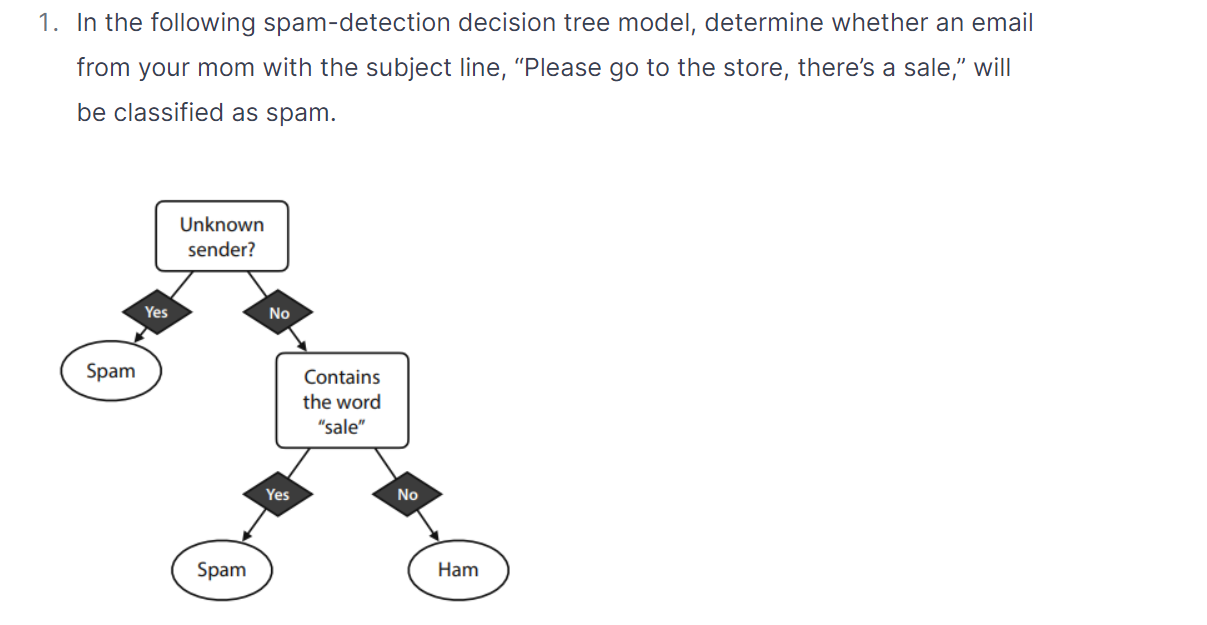

will be classified as spam